# Learning pandas yay!

## Module 1 Intro

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#series
s = pd.Series([1,2,3,4],index=['a','b','c','d'])
print(s)

a    1
b    2
c    3
d    4
dtype: int64


In [2]:
# data frame {i guess they are same as r}
data = { 'Name':['Alice','Bobby','Charles'],'Age':[22,27,21],'City':['NY','Munich','Boston']}
df = pd.DataFrame(data)
print(df) 

      Name  Age    City
0    Alice   22      NY
1    Bobby   27  Munich
2  Charles   21  Boston


In [3]:
array = np.array([[1,2],[3,4]])
df1= pd.DataFrame(array,columns=['A','B'])
print(df)  

      Name  Age    City
0    Alice   22      NY
1    Bobby   27  Munich
2  Charles   21  Boston


In [16]:
#operations on series 
#arithmetic
s1 = pd.Series([1,2,3])
s2 = pd.Series([4,5,6])
print(s1+s2)

0    5
1    7
2    9
dtype: int64


In [17]:
#df operations
print(df['Age'])
print(df['City'])

0    22
1    27
2    21
Name: Age, dtype: int64
0        NY
1    Munich
2    Boston
Name: City, dtype: object


In [18]:
#ading col.
df['IsAdult'] = df['Age'] > 18
print(df)


      Name  Age    City  IsAdult
0    Alice   22      NY     True
1    Bobby   27  Munich     True
2  Charles   21  Boston     True


#### indexing basics 
.loc[] - index based
.iloc[] - position based

In [19]:
print(df.loc[1])
print('')
print(df.iloc[0])


Name        Bobby
Age            27
City       Munich
IsAdult      True
Name: 1, dtype: object

Name       Alice
Age           22
City          NY
IsAdult     True
Name: 0, dtype: object


### Module 2

#### Reading data with pandas

CSV , Excel , JSON , SQL , Parquet , HTML -> are the common data types which we can import

use .read_{name from above}



In [20]:
df_csv = pd.read_csv('practise_pandas.csv')
df_csv.head()


,OrderID,Product,Category,Price,Quantity,Customer,OrderDate
0,1001,Laptop,Electronics,999.99,1,Alice Smith,2025-09-01
1,1002,Headphones,Electronics,49.99,2,Bob Johnson,2025-09-02
2,1003,Desk Chair,Furniture,129.99,1,Carol Williams,2025-09-03
3,1004,Smartphone,Electronics,699.99,1,David Brown,2025-09-04
4,1005,Notebook,Stationery,5.99,10,Emma Davis,2025-09-05


In [21]:
print(df_csv.head())

   OrderID     Product     Category   Price  Quantity        Customer  \
0     1001      Laptop  Electronics  999.99         1     Alice Smith   
1     1002  Headphones  Electronics   49.99         2     Bob Johnson   
2     1003  Desk Chair    Furniture  129.99         1  Carol Williams   
3     1004  Smartphone  Electronics  699.99         1     David Brown   
4     1005    Notebook   Stationery    5.99        10      Emma Davis   

    OrderDate  
0  2025-09-01  
1  2025-09-02  
2  2025-09-03  
3  2025-09-04  
4  2025-09-05  


Common Pararmeters  
sep ='the seperator like ; or , ' | {tells which symbol seperates the value} \
inex_col ='col name' | [tells which column is the index column] \
parse_dates =['col name'] | {tells which cols are dates} 


In [22]:
#EXAMPLE CSV WITH SOME PARAMETERS
#  df_csv = pd.read_csv("data.csv",sep=';',index_col='ID',parse_dates=['dates'])

#### Writing data in files 

CSV , Excel , JSON , SQL , Parquet , HTML -> are the common data types which we can export

In [23]:
df.to_csv('test.csv',index=False)
# This basically converts data frames into csv files and there are many more parameters too

Common parameters of to_csv
- `path_or_buf` — output file path or buffer
    
- `sep` — delimiter (default `,`)
    
- `index` — write row index (default `True`)
    
- `header` — write column headers (default `True`)
    
- `columns` — subset of columns to write
    
- `encoding` — output file encoding
    

##### similar stuff for all other file types

### Module 3 Data Selection & Indexing


In [5]:
df2 = pd.DataFrame(data ,index=['a','b','c'])
print(df2,"\n")
print(df.loc[0],"\n") #by default index is 0,1,2 .....
print(df2.loc['b'],"\n") #we put special index when we made the df
print(df2.loc[['a','c']])

      Name  Age    City
a    Alice   22      NY
b    Bobby   27  Munich
c  Charles   21  Boston 

Name    Alice
Age        22
City       NY
Name: 0, dtype: object 

Name     Bobby
Age         27
City    Munich
Name: b, dtype: object 

      Name  Age    City
a    Alice   22      NY
c  Charles   21  Boston


In [25]:
# this is the syntax df.loc['row','col']
print(df2.loc['a','Name'])

Alice


In [26]:
# .iloc()
print(df2.iloc[0:2])
# The position must be integers or slices (nothing else works)


    Name  Age    City
a  Alice   22      NY
b  Bobby   27  Munich


- `.at[]` is like `.loc[]` but **only for single scalar values** by label — faster access.
    
- `.iat[]` is like `.iloc[]` but **only for single scalar values** by position — faster access.


In [27]:
print(df2.at["a","Name"])
print(df2.iat[0,0])
print(df2.iat[1,0])

Alice
Alice
Bobby


In [28]:
#boolean indexing (learned beforeee)
print(df2[df2["Age"]>21],"\n")
# You can use multiple conditions by using &(and) and |(or) symbols
print(df2[(df2["Age"] < 22) | (df2["City"] == "Munich")])

    Name  Age    City
a  Alice   22      NY
b  Bobby   27  Munich 

      Name  Age    City
b    Bobby   27  Munich
c  Charles   21  Boston


In [29]:
# We can use bool  indexing with loc

#some data
print(df2.loc[df2['Age']<22, ["Name","Age"]],"\n")

#all data
print(df2.loc[df2['Age']<22])

      Name  Age
c  Charles   21 

      Name  Age    City
c  Charles   21  Boston


You can select columns by using col names (duhh)

### Module 4 Data Cleaning and Missing Data
Missing data in pandas is usually represented as NaN (Not a Number) or None.

In [6]:
#example
data1 = { 'Name':['Alice','Bobby','Charles'],'Age':[22,np.nan,21],'City':['NY','Munich',None]}
df3 = pd.DataFrame(data1)
df3


,Name,Age,City
0,Alice,22.0,NY
1,Bobby,NaN,Munich
2,Charles,21.0,None


In [31]:
# how to check for none and nan
print(df3.isnull())

    Name    Age   City
0  False  False  False
1  False   True  False
2  False  False   True


In [32]:
# sum of all null in a DF
print(df3.isnull().sum())

Name    0
Age     1
City    1
dtype: int64


In [33]:
# Drop missing values
print(df3.dropna(axis=0),"\n") #rows
print(df3.dropna(axis=1)) #column

    Name   Age City
0  Alice  22.0   NY 

      Name
0    Alice
1    Bobby
2  Charles


In [34]:
# Filling missing values
# .fillna() function
print(df3) 
# The age of bobby is missing so we can do :-
df3.fillna(int(df3['Age'].mean())) 

      Name   Age    City
0    Alice  22.0      NY
1    Bobby   NaN  Munich
2  Charles  21.0    None


,Name,Age,City
0,Alice,22.0,NY
1,Bobby,21.0,Munich
2,Charles,21.0,21


In [38]:
# Detecting And Removing Duplicates
data3 = { 'Name': ['Alice', 'Bob', 'Bob', 'David', 'Alice'], 'Age': [25, 30, 30, 40, 25] }
df4 = pd.DataFrame(data3)
print("original :-")
print(df4 , "\n")
print("detecting dupes :-")
print(df4.duplicated(),"\n")
print("dropping dupe entries :-")
print(df4.drop_duplicates())


original :-
    Name  Age
0  Alice   25
1    Bob   30
2    Bob   30
3  David   40
4  Alice   25 

detecting dupes :-
0    False
1    False
2     True
3    False
4     True
dtype: bool 

dropping dupe entries :-
    Name  Age
0  Alice   25
1    Bob   30
3  David   40


Data type Handling and Conversion

In [36]:
print(df4.dtypes)
df4['Age'].astype("Int64")

Name    object
Age      int64
dtype: object


0    25
1    30
2    30
3    40
4    25
Name: Age, dtype: Int64

In [37]:
dates = pd.Series(['2020-01-01','2021-05-12',None])
dates = pd.to_datetime(dates)
dates

0   2020-01-01
1   2021-05-12
2          NaT
dtype: datetime64[ns]

##### Additional Useful Cleaning Functions

- `.replace()` — replace specific values
    
- `.rename()` — rename columns or indexes
    
- `.astype()` — convert types
    
- `.apply()` — apply custom cleaning functions

In [38]:
df4.replace(25,17)

,Name,Age
0,Alice,17
1,Bob,30
2,Bob,30
3,David,40
4,Alice,17


#### Module 5 Data Transdormation

In [10]:
# Sorting Algorithm
sort_df = df2.sort_values(by='Age')
sort_df


,Name,Age,City
c,Charles,21,Boston
a,Alice,22,NY
b,Bobby,27,Munich


In [16]:
# Sorting by multiple colss
sort_df1 = df2.sort_values(by=['City','Age'])
sort_df1

,Name,Age,City
c,Charles,21,Boston
b,Bobby,27,Munich
a,Alice,22,NY


In [19]:
# Filtering Rows
filtered_df = df2[df2['Age']>21]
filtered_df

# you can do multiple logical expressions  using & and |

,Name,Age,City
a,Alice,22,NY
b,Bobby,27,Munich


In [ ]:
df4.at[3,"Age"] = 51
# Applying functions
# To a column
def age_grp(age):
    if age < 30:
        return "Young"
    elif age < 40:
        return "Middle Aged"
    else:
        return "Old"
    
df4['Age_Group'] = df4['Age'].apply(age_grp)
df4 

,Name,Age,Age_Group
0,Alice,25,Young
1,Bob,30,Middle Aged
2,Bob,30,Middle Aged
3,David,51,Old
4,Alice,25,Young


To apply to specific row use .apply({func name}, axis = 1)

In [65]:
# Vectorized operations 
# For example
df4["Ageplus5"] = df4["Age"] + 5
print(df4)
df4 = df4.drop(columns="Ageplus5")
print("\n",df4)

    Name  Age    Age_Group  Ageplus5
0  Alice   25        Young        30
1    Bob   30  Middle Aged        35
2    Bob   30  Middle Aged        35
3  David   51          Old        56
4  Alice   25        Young        30

     Name  Age    Age_Group
0  Alice   25        Young
1    Bob   30  Middle Aged
2    Bob   30  Middle Aged
3  David   51          Old
4  Alice   25        Young


In [70]:
# Vectorized string operations
df4["NameUpper"] = df["Name"].str.upper()
print(df4)
df4 = df4.drop(columns="NameUpper")
print("\n",df4)

    Name  Age    Age_Group NameUpper
0  Alice   25        Young     ALICE
1    Bob   30  Middle Aged     BOBBY
2    Bob   30  Middle Aged   CHARLES
3  David   51          Old       NaN
4  Alice   25        Young       NaN

     Name  Age    Age_Group
0  Alice   25        Young
1    Bob   30  Middle Aged
2    Bob   30  Middle Aged
3  David   51          Old
4  Alice   25        Young


###### Mapping and Replacing Values

In [83]:
#Map values based on a dict or a function
df4.at[4 , "Name"] = "Alex"
df4.at[1,"Name"] = "Carl"
df4["Performace"] = ["Good","Average","Good","Excellent","Excellent"]
grades_map = {'Excellent':'A','Good':'B','Average':'C'}
df4["grade"] = df4["Performace"].map(grades_map)
print(df4)

    Name  Age    Age_Group Performace grade
0  Alice   25        Young       Good     B
1   Carl   30  Middle Aged    Average     C
2    Bob   30  Middle Aged       Good     B
3  David   51          Old  Excellent     A
4   Alex   25        Young  Excellent     A


In [87]:
# Replacing values directly
df4["grade"] = df4['grade'].replace({'A':'A+','B':'B+','C':'C+'})
df4

,Name,Age,Age_Group,Performace,grade
0,Alice,25,Young,Good,B+
1,Carl,30,Middle Aged,Average,C+
2,Bob,30,Middle Aged,Good,B+
3,David,51,Old,Excellent,A+
4,Alex,25,Young,Excellent,A+


In [93]:
df4.rename(columns={"grade":"Grades"},inplace=True) #just capitalized the G
df4

,Name,Age,Age_Group,Performace,Grades
0,Alice,25,Young,Good,B+
1,Carl,30,Middle Aged,Average,C+
2,Bob,30,Middle Aged,Good,B+
3,David,51,Old,Excellent,A+
4,Alex,25,Young,Excellent,A+


In [94]:
# Sometimes when you want to set one of your colums as the index then you can use

#    df4.set_index({Col name}, inplace=True)

#### Module 6 Grouping , Aggregation & Pivoting


In [3]:
data2 = {'Region': ['East', 'West', 'East', 'West', 'North', 'South', 'East'],'Salesperson': ['Anna', 'Ben', 'Anna', 'Diana', 'Ben', 'Anna', 'Diana'],'Sales': [250, 150, 200, 300, 400, 150, 100] }
df5 = pd.DataFrame(data2)
df5_grouped = df5.groupby("Region")["Sales"].sum() #Group by "Region" and sum sales
df5_grouped


Region
East     550
North    400
South    150
West     450
Name: Sales, dtype: int64

In [19]:
# Group by multiple columns
df5_grouped = df5.groupby(["Region","Salesperson"])["Sales"].sum()
df5_grouped

Region  Salesperson
East    Anna           450
        Diana          100
North   Ben            400
South   Anna           150
West    Ben            150
        Diana          300
Name: Sales, dtype: int64

In [ ]:
# To convert it back into DF from grouped versions
df5_grouped = df5_grouped.reset_index()
df5_grouped.drop(columns=["level_0","index"])

,Region,Salesperson,Sales
0,East,Anna,450
1,East,Diana,100
2,North,Ben,400
3,South,Anna,150
4,West,Ben,150
5,West,Diana,300


###### Aggregation Functions
- `.sum()`, `.mean()`, `.median()`, `.max()`, `.min()`, `.count()`, `.std()` (standard deviation), `.var()` (variance)

In [25]:
#use multiple aggregate func on one DF
df5_grouped = df5.groupby("Region")["Sales"].agg(["sum","mean","count"])
df5_grouped

,sum,mean,count
Region,,,
East,550,183.333333,3
North,400,400.000000,1
South,150,150.000000,1
West,450,225.000000,2


In [26]:
# you can also use user defined funcs in .agg
#   df5_grouped = df5.groupby("Region")["Sales"].agg(["sum","mean",{ur func name without ""}])


In [ ]:
# Aggregation on multiple columns
df5["Expenses"] = [100,50,60,120,150,70,30]
df5_grouped = df5.groupby("Region").agg({'Sales':['sum','mean'] , "Expenses" : ['sum','mean']})
df5_grouped


Sales             Expenses            
         sum        mean      sum        mean
Region                                       
East     550  183.333333      190   63.333333
North    400  400.000000      150  150.000000
South    150  150.000000       70   70.000000
West     450  225.000000      170   85.000000

In [31]:
df5_pivot = df5.pivot_table(values='Sales',index='Region',columns="Salesperson",aggfunc='sum',fill_value=0)
df5_pivot

Salesperson,Anna,Ben,Diana
Region,,,
East,450,0,100
North,0,400,0
South,150,0,0
West,0,150,300


In [33]:
df5_crosstab = pd.crosstab(df5['Region'],df5["Salesperson"])
df5_crosstab

Salesperson,Anna,Ben,Diana
Region,,,
East,2,0,1
North,0,1,0
South,1,0,0
West,0,1,1


In [5]:
# Transformation Vs Aggregation


#.tranform()
#.agg()

df5["Sales_norm"] = df5.groupby('Region')['Sales'].transform(lambda x : (x-x.mean())/x.std())
df5

,Region,Salesperson,Sales,Sales_norm
0,East,Anna,250,0.872872
1,West,Ben,150,-0.707107
2,East,Anna,200,0.218218
3,West,Diana,300,0.707107
4,North,Ben,400,NaN
5,South,Anna,150,NaN
6,East,Diana,100,-1.091089


In [18]:
# Filter groups
print(df5.groupby('Region').filter(lambda x : x['Sales'].sum() >400))

  Region Salesperson  Sales  Sales_norm
0   East        Anna    250    0.872872
1   West         Ben    150   -0.707107
2   East        Anna    200    0.218218
3   West       Diana    300    0.707107
6   East       Diana    100   -1.091089


In [4]:
# Iterating over Groups
for region, group in df5.groupby('Region'):
    print(f"Region:{region}")
    print(group)
    print()

Region:East
  Region Salesperson  Sales
0   East        Anna    250
2   East        Anna    200
6   East       Diana    100

Region:North
  Region Salesperson  Sales
4  North         Ben    400

Region:South
  Region Salesperson  Sales
5  South        Anna    150

Region:West
  Region Salesperson  Sales
1   West         Ben    150
3   West       Diana    300



##### Bonus: Advanced GroupBy Features

- **`as_index` argument:** By default `groupby` uses grouping columns as index. Use `as_index=False` to keep as columns.
    
    python
    
    
    
    `df.groupby('Region', as_index=False)['Sales'].sum()`
    
- **`group_keys` argument:** Controls whether group keys are included in the result.
    
- **`named aggregation` (Pandas 0.25+):**


#### Module 7 : Merging Joining and Concantations

In [8]:
# pd.concat() is used axis = 0 {default, stack rows} and axis = 1 {stack cols}

df6 = pd.DataFrame({'A':['A0','A1'],'B':['B0','B1']})
df7 = pd.DataFrame({'A':['A2','A3'],'B':['B2','B3']})
df_result = pd.concat([df6,df7])
print(df_result,"\n")
df_result = pd.concat([df6,df7],axis=1)
print(df_result,"\n")

# What i infer from this that at least one thing must be common bte the data either a row or a column

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3 

    A   B   A   B
0  A0  B0  A2  B2
1  A1  B1  A3  B3 



In [ ]:
# Merging with pd.merge()

left = pd.DataFrame({'Key':["K0","K1","K2"] , "A":['A0','A1','A2']})
right = pd.DataFrame({'Key':["K0","K1","K2"] , "B":['B0','B1','B2']})
merged = pd.merge(left , right , on='Key')
merged

,Key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


`on='key'`: Merge on the 'key' column present in both DataFrames \
Default join type is `inner` , so only keys present in both are kept

Types of joins in pd.merge()

- `inner` (default): intersection of keys
    
- `left`: all keys from left + matching from right
    
- `right`: all keys from right + matching from left
    
- `outer`: union of keys (all keys from both sides, missing filled with NaN)

- `cross` and a few more

In [16]:
#Example of other type of join
merged1 = pd.merge(left ,right , on= 'Key', how='left')
print(merged1) 

  Key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2


In [19]:
# merging on multiple cols
left_multi = pd.DataFrame({ 'key1': ['K0', 'K1', 'K0', 'K1'], 'key2': ['K0', 'K0', 'K1', 'K1'], 'A': ['A0', 'A1', 'A2', 'A3'] })
right_multi = pd.DataFrame({ 'key1': ['K0', 'K1', 'K1', 'K1'], 'key2': ['K0', 'K0', 'K0', 'K1'], 'B': ['B0', 'B1', 'B2', 'B3'] })
merged2 = pd.merge(left_multi , right_multi , on=['key1','key2'],how='inner')
merged2

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K0,A1,B1
2,K1,K0,A1,B2
3,K1,K1,A3,B3


In [30]:
left_in = pd.DataFrame({'A':["a0","a1","a2"]},index=['k0','k1','k2'])
right_in = pd.DataFrame({'b':["b0","b1","b2"]},index=['k0','k1','k2'])
merged3 = pd.merge(left_in,right_in , left_index=True , right_index=True , how='outer')
merged3

,A,b
k0,a0,b0
k1,a1,b1
k2,a2,b2


In [36]:
left_in = pd.DataFrame({'A':["a0","a1","a2"]},index=['k0','k1','k2'])
right_in = pd.DataFrame({'b':["b0","b1","b2"]},index=['k0','k1','k3'])
joined = left_in.join(right_in , how='outer')
joined # Basically like merge just another method to do it

,A,b
k0,a0,b0
k1,a1,b1
k2,a2,NaN
k3,NaN,b2


In [42]:
left = pd.DataFrame({'Key':["K0","K1","K2"] , "A":['A0','A1','A2']})
right = pd.DataFrame({'Key':["K0","K1","K2"] , "A":['B0','B1','B2']})
merged4 = pd.merge(left , right , on='Key',how='inner') 
print("default perfixes :\n", merged4)
merged4 = pd.merge(left , right , on='Key',how='inner',suffixes=['_left','_right'])
print("\n custom prefixes perfixes :\n", merged4)

default perfixes :
   Key A_x A_y
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2

 custom prefixes perfixes :
   Key A_left A_right
0  K0     A0      B0
1  K1     A1      B1
2  K2     A2      B2


In [47]:
# Concat with keys 
df_result = pd.concat([df6,df7],keys=['df6','df7']) #   basically custom index for each DF
df_result

A   B
df6 0  A0  B0
    1  A1  B1
df7 0  A2  B2
    1  A3  B3

#### Module 8 Time Series & Date/Time

IDK if this is even usefull or not ???

 Summary 

| Concept              | Function/Method                                | Purpose                             |
|----------------------|-------------------------------------------------|-------------------------------------|
| Single timestamp     | `pd.Timestamp()`                                | Create one datetime                 |
| Datetime array/index | `pd.to_datetime()`, `pd.date_range()`           | Create date ranges or parse strings |
| DateTime indexing    | Set datetime as index                           | Enables time slicing                |
| Resampling           | `.resample(freq).agg()`                         | Change frequency, aggregate data    |
| Rolling calculations | `.rolling(window).agg()`                        | Moving averages, sums, etc.         |
| Timezone aware       | `.tz_localize()`, `.tz_convert()`               | Manage time zones                   |
| Periods              | `pd.Period()`, `pd.period_range()`              | Represent spans of time             |


Will do it later iffffffff

#### Module 9 : Advaced Topics

In [22]:
colors = pd.Series(['red','blue','green','blue','red'])
colors_cat = colors.astype('category')
print(" .astype method :-")
print(colors_cat,'\n')
colors_cat = pd.Categorical(values=colors)  # did this by guessing basically
print(" Comparison btw .astype method and .categorical method  \n")
print("\n .Categorical method :-")
print(colors_cat)

 .astype method :-
0      red
1     blue
2    green
3     blue
4      red
dtype: category
Categories (3, object): ['blue', 'green', 'red'] 

 Comparison btw .astype method and .categorical method  


 .Categorical method :-
['red', 'blue', 'green', 'blue', 'red']
Categories (3, object): ['blue', 'green', 'red']


In [23]:
# In the above ex the categories were made implicitly 
# We can also define the catgories beforehand
sizes = pd.Series(['small','medium','large','medium','small'])
sizes_cat = sizes.astype(pd.CategoricalDtype(categories=['small','medium','large'],ordered=True))
print(" .astype method :-")
print(sizes_cat,'\n')
print("Comparison btw .astype method and .categorical method ")
print("\n .Categorical method :-")
sizes_cat = pd.Categorical(values=sizes ,categories=['small','medium','large'], ordered=True)
print(sizes_cat)

 .astype method :-
0     small
1    medium
2     large
3    medium
4     small
dtype: category
Categories (3, object): ['small' < 'medium' < 'large'] 

Comparison btw .astype method and .categorical method 

 .Categorical method :-
['small', 'medium', 'large', 'medium', 'small']
Categories (3, object): ['small' < 'medium' < 'large']


In [4]:
# Creating Multindex DataFrame
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo'],['one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays , names=['First','Second'])
df8 = pd.DataFrame({'A':range(6),'B':range(6,12)},index=index)
df8

A   B
First Second       
bar   one     0   6
      two     1   7
baz   one     2   8
      two     3   9
foo   one     4  10
      two     5  11

In [9]:
# Advance Grouping
adv_grouped = df8.groupby(level='First').sum()
adv_grouped

,A,B
First,,
bar,1,13
baz,5,17
foo,9,21


In [11]:
# Advance Indexing & Slicing
# We can use pd.IndexSlice to slice multiindex DF
idx = pd.IndexSlice
df8.loc[idx[:,'two'],:]

,,A,B
First,Second,,
bar,two,1,7
baz,two,3,9
foo,two,5,11


###### Efficient String Operations with `.str`

Pandas vectorizes string operations via `.str` accessor, super useful on large datasets.

Examples:

s = pd.Series(['Apple', 'Banana', 'Pear']) 
print(s.str.lower()) 
print(s.str.contains('a')) 
print(s.str.replace('a', '@'))`


Memory Usage Inspection

Quickly inspect DataFrame memory:
`print(df.info(memory_usage='deep'))`


.

#### Module 10 : Visualization with pandas

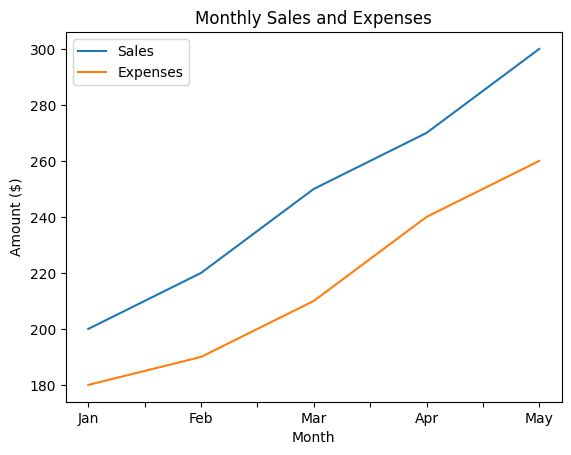

In [24]:
df9 = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],'Sales': [200, 220, 250, 270, 300],'Expenses': [180, 190, 210, 240, 260]})
df9.set_index('Month',inplace=True)
df9.plot()
plt.title("Monthly Sales and Expenses")
plt.ylabel("Amount ($)")
plt.show()

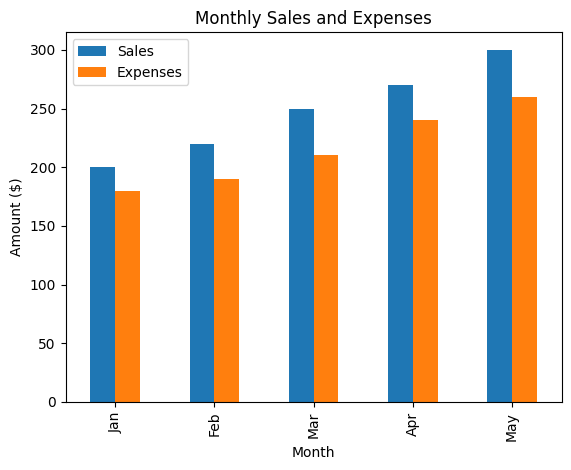

In [27]:
df9.plot(kind='bar')
plt.title("Monthly Sales and Expenses")
plt.ylabel("Amount ($)")
plt.show()

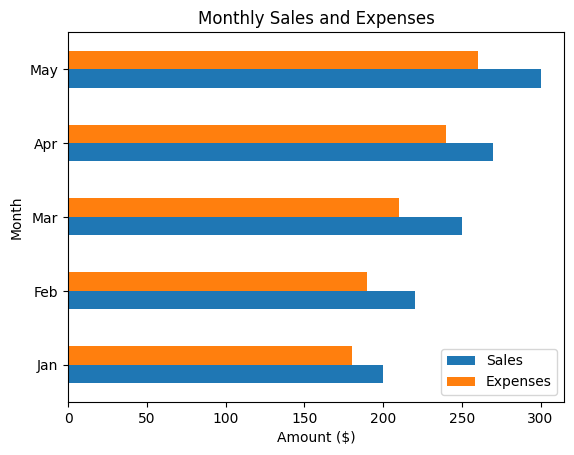

In [31]:
df9.plot(kind='barh')
plt.title("Monthly Sales and Expenses")
plt.xlabel("Amount ($)")
plt.show()

Text(0.5, 1.0, 'Boxplot for Sales and Expenses')

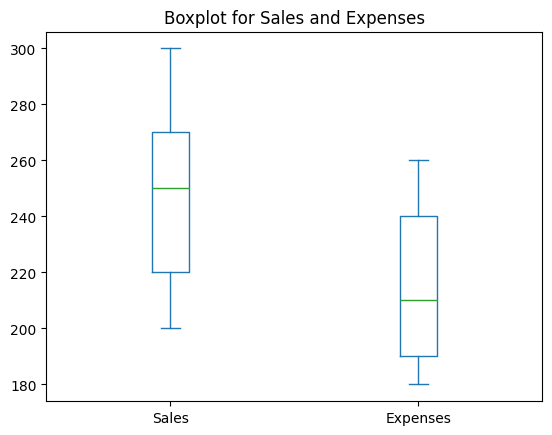

In [37]:
df9.plot(kind='box')
plt.title("Boxplot for Sales and Expenses")

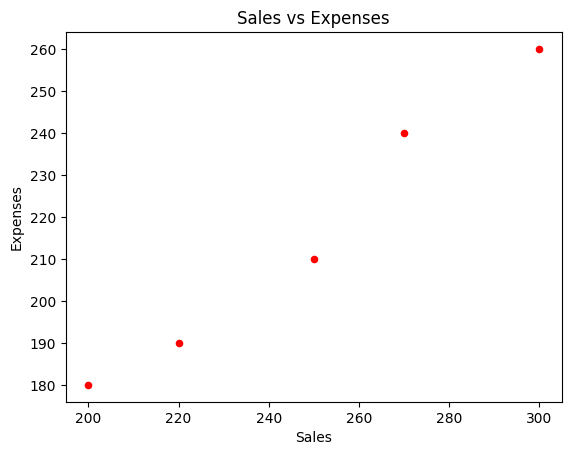

In [40]:
df9.plot(kind='scatter',x='Sales',y='Expenses',color = 'red')
plt.title("Sales vs Expenses")
plt.show()

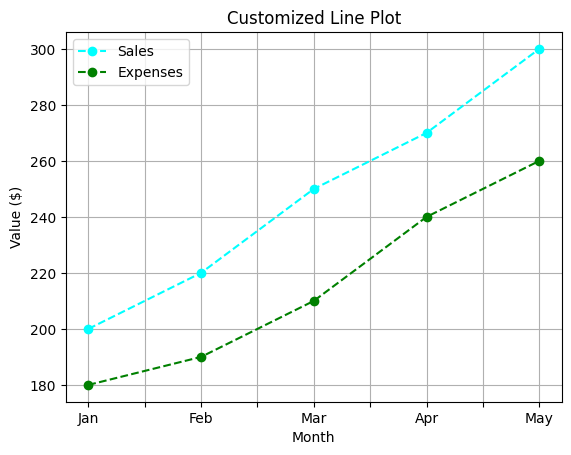

In [47]:
ax = df9.plot(color = ['cyan','green'],marker='o',linestyle='--',grid=True)
ax.set_xlabel('Month')
ax.set_ylabel("Value ($)")
ax.set_title("Customized Line Plot")
plt.show()

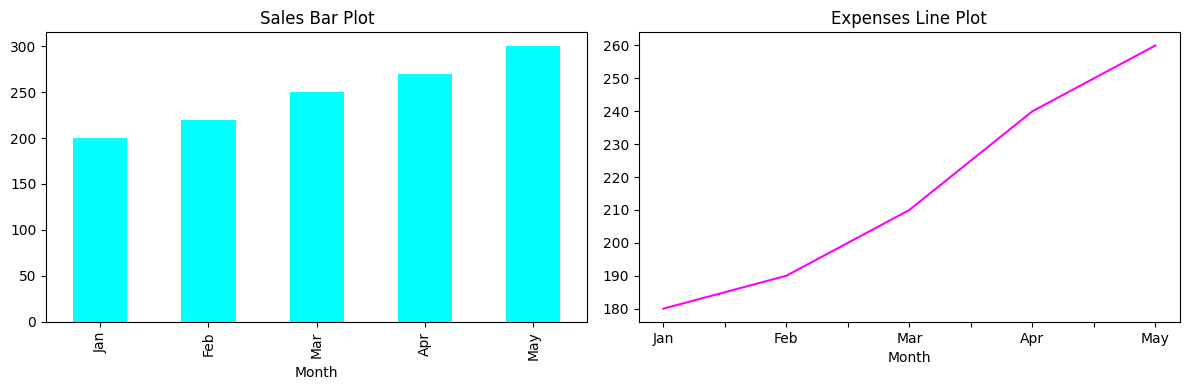

In [49]:
# Plotting multiple plots on the same figure 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df9['Sales'].plot(kind='bar', ax=axes[0], color='cyan')
axes[0].set_title("Sales Bar Plot")
df9['Expenses'].plot(kind='line', ax=axes[1], color='magenta')
axes[1].set_title("Expenses Line Plot")
plt.tight_layout()
plt.show()

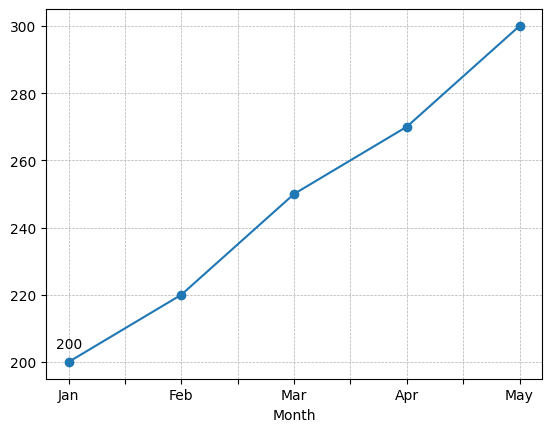

In [54]:
# Integration with matplotlib

ax = df9['Sales'].plot(kind='line', marker='o') 
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  
for i, val in enumerate(df9['Sales']):     
    ax.annotate(str(val), (i, val), textcoords="offset points", xytext=(0,10), ha='center')  
    plt.show()

Text(0.5, 1.0, 'Sales vs Expenses with Regression line using Seaborn')

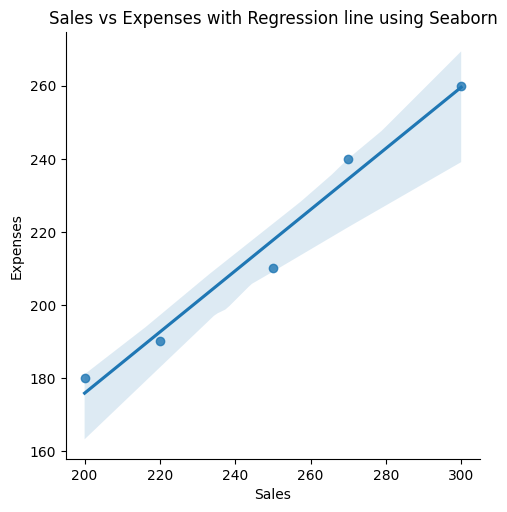

In [57]:
sns.lmplot(x='Sales',y='Expenses',data=df9.reset_index())
plt.title("Sales vs Expenses with Regression line using Seaborn")

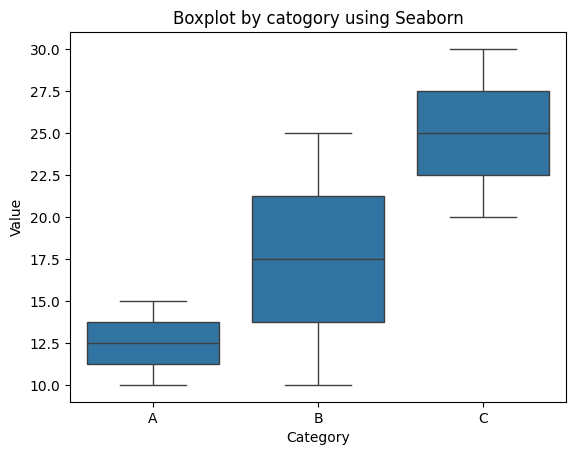

In [61]:
df10 = pd.DataFrame({'Category':['A', 'A', 'B', 'B', 'C', 'C'],'Value': [10, 15, 10, 25, 20, 30]})
sns.boxplot(x='Category',y='Value',data=df10)
plt.title("Boxplot by catogory using Seaborn")
plt.show()


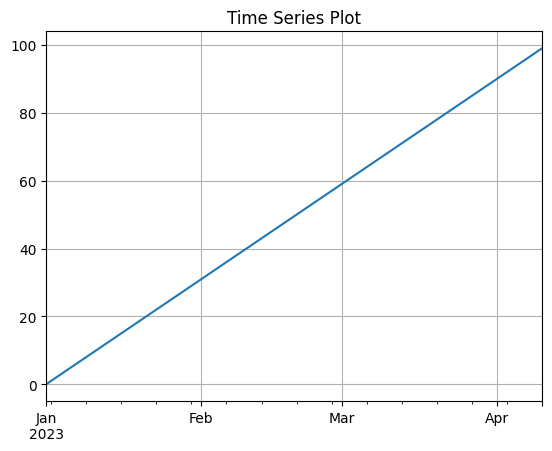

In [63]:
# Plotting time series data
# If your DataFrame has a DateTime index, pandas plotting shines
dates = pd.date_range(start='2023-01-01', periods=100) 
ts = pd.Series(range(100), index=dates) 
ts.plot(title="Time Series Plot", grid=True) 
plt.show()

 Advanced plot types via pandas

- **Area plot**: `df.plot.area()`
    
- **Pie chart**: `df['Sales'].plot.pie()`
    
- **Hexbin plot** (2D histogram for large datasets): `df.plot.hexbin(x='col1', y='col2', gridsize=30)`


Saving plots

You can save figures using matplotlib’s `savefig()`:


fig = df.plot().get_figure() \
fig.savefig('plot.png', dpi=300)

Styling plots with pandas options

You can set global plotting styles:

pd.options.plotting.backend = "matplotlib"  # default \
plt.style.use('seaborn-darkgrid')


Quick Recap Table

|Plot Type|pandas call|Usage|
|---|---|---|
|Line|`df.plot()`|Time series, trend lines|
|Bar|`df.plot(kind='bar')`|Comparing categories|
|Histogram|`df.plot(kind='hist')`|Distribution analysis|
|Boxplot|`df.plot(kind='box')`|Distribution & outliers|
|Scatter|`df.plot(kind='scatter')`|Relationships between variables|
|Area|`df.plot.area()`|Stacked data over time|
|Pie|`df['col'].plot.pie()`|Part-of-whole representation|
|Hexbin|`df.plot.hexbin(x, y)`|Density visualization|


#### Module 11 & 12 are purely theoretical so not practising here


# FINISH